In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
#loading Datasets and reading files
customers_file = pd.read_csv("/content/drive/MyDrive/Customers.csv")
products_file = pd.read_csv("/content/drive/MyDrive/Products.csv")
transactions_file = pd.read_csv("/content/drive/MyDrive/Transactions.csv")

#Customers EDA

In [25]:

customers_file.head()


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [26]:
customers_info = customers_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [27]:
customers_missing = customers_file.isnull().sum()
customers_missing


,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


In [11]:

customers_info = customers_file.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB


# Convert SignupDate to datetime

In [44]:
customers_file['SignupDate'] = pd.to_datetime(customers_file['SignupDate'])

# Region distribution

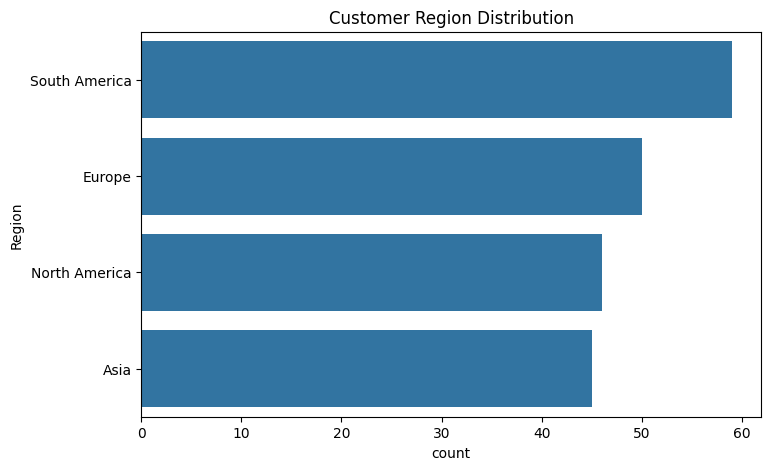

In [45]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Region', data=customers_file, order=customers_file['Region'].value_counts().index)
plt.title('Customer Region Distribution')
plt.show()

# Signup year distribution

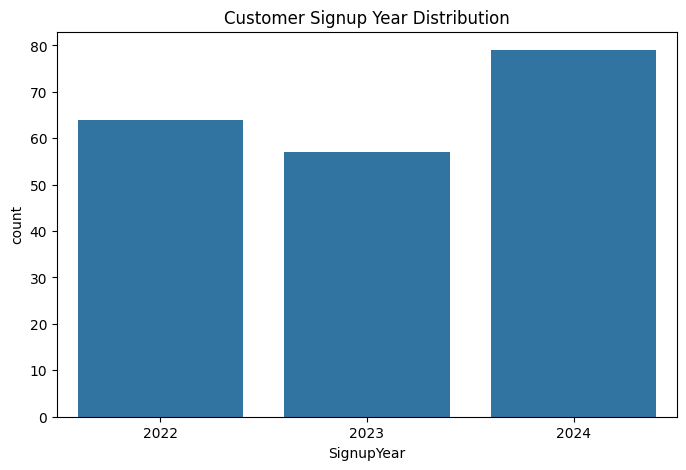

In [46]:
customers_file['SignupYear'] = customers_file['SignupDate'].dt.year
plt.figure(figsize=(8, 5))
sns.countplot(x='SignupYear', data=customers_file)
plt.title('Customer Signup Year Distribution')
plt.show()

#Products EDA

In [29]:
products_file.head()

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


In [30]:
products_info = products_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB


In [31]:
#checking missing values
products_missing = products_file.isnull().sum()
products_missing

,0
ProductID,0
ProductName,0
Category,0
Price,0


#Checking for missing values

In [14]:

customers_missing = customers_file.isnull().sum()
customers_missing


,0
CustomerID,0
CustomerName,0
Region,0
SignupDate,0


# Category distribution

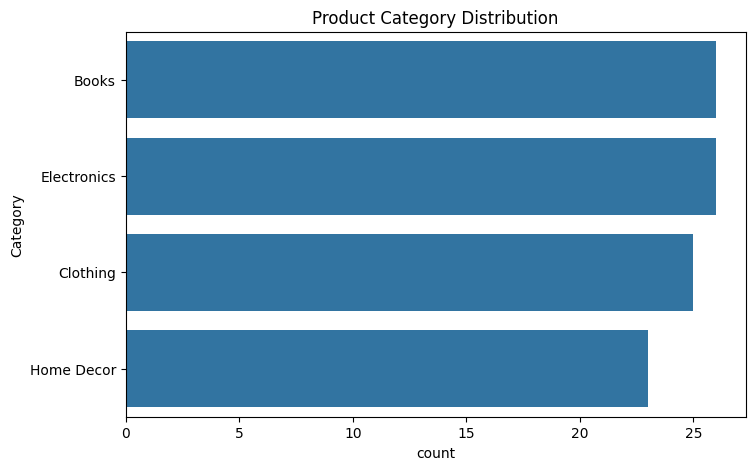

In [40]:
plt.figure(figsize=(8, 5))
sns.countplot(y='Category', data=products_file, order=products_file['Category'].value_counts().index)
plt.title('Product Category Distribution')
plt.show()

# Price distribution

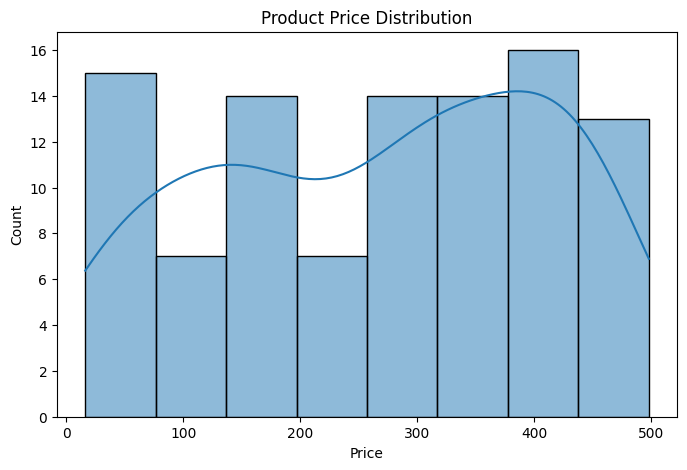

In [42]:
plt.figure(figsize=(8, 5))
sns.histplot(products_file['Price'], kde=True)
plt.title('Product Price Distribution')
plt.show()

#Transactions EDA

In [32]:
transactions_file.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [33]:
transactions_info=transactions_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 54.8+ KB


In [16]:
transactions_missing = transactions_file.isnull().sum()
transactions_missing

,0
TransactionID,0
CustomerID,0
ProductID,0
TransactionDate,0
Quantity,0
TotalValue,0
Price,0


In [17]:
transactions_file.describe()

,Quantity,TotalValue,Price
count,1000.000000,1000.000000,1000.00000
mean,2.537000,689.995560,272.55407
std,1.117981,493.144478,140.73639
min,1.000000,16.080000,16.08000
25%,2.000000,295.295000,147.95000
50%,3.000000,588.880000,299.93000
75%,4.000000,1011.660000,404.40000
max,4.000000,1991.040000,497.76000


# Distribution of Quantity, TotalValue, Price

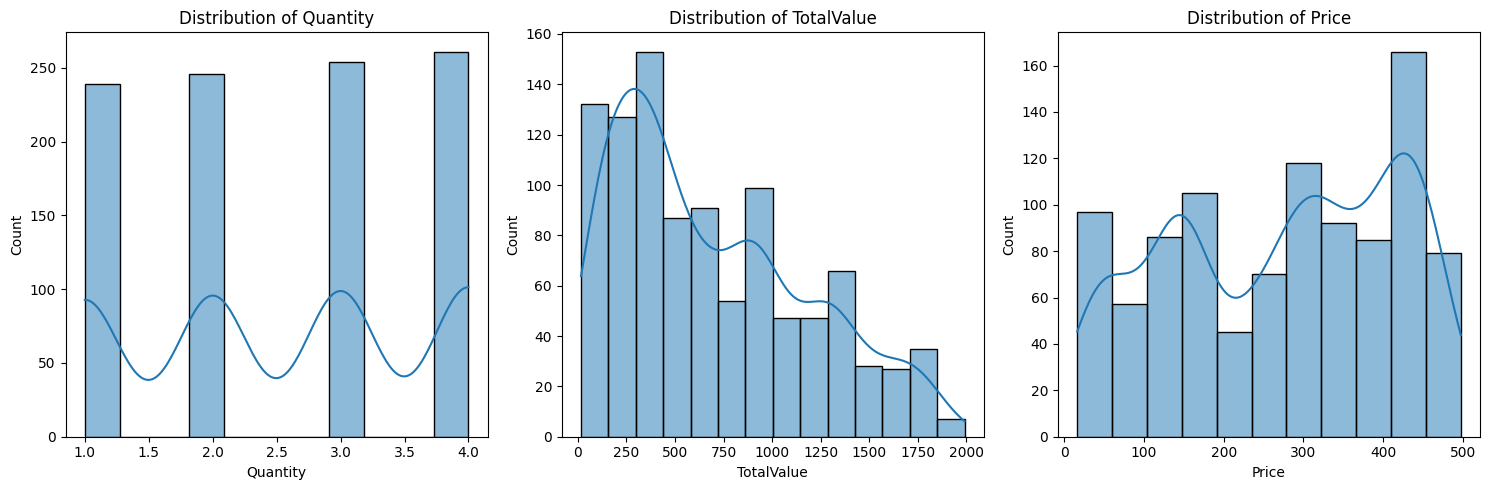

In [34]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.histplot(transactions_file['Quantity'], kde=True)
plt.title('Distribution of Quantity')
plt.subplot(1, 3, 2)
sns.histplot(transactions_file['TotalValue'], kde=True)
plt.title('Distribution of TotalValue')
plt.subplot(1, 3, 3)
sns.histplot(transactions_file['Price'], kde=True)
plt.title('Distribution of Price')
plt.tight_layout()

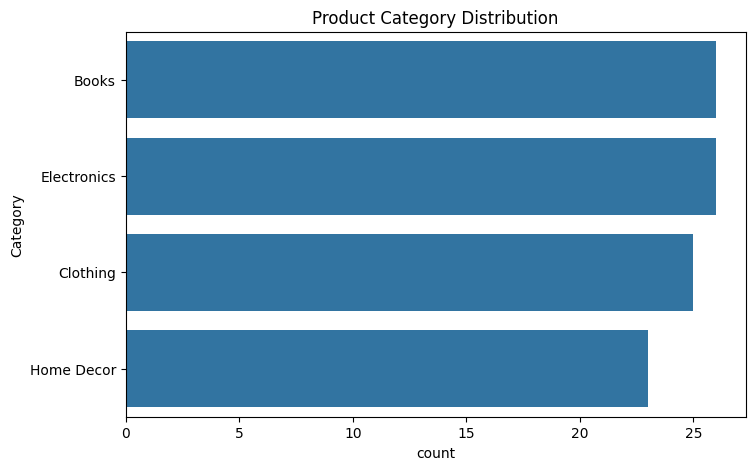

In [24]:

plt.figure(figsize=(8, 5))
sns.countplot(y='Category', data=products_file, order=products_file['Category'].value_counts().index)
plt.title('Product Category Distribution')

plt.show()

# Convert 'SignupDate' and 'TransactionDate' to datetime format for better analysis

In [47]:

customers_file['SignupDate'] = pd.to_datetime(customers_file['SignupDate'])
transactions_file['TransactionDate'] = pd.to_datetime(transactions_file['TransactionDate'])

# Mergeing datasets for comprehensive analysis

In [48]:
merged_data = transactions_file.merge(customers_file, on="CustomerID").merge(products_file, on="ProductID")
merged_data

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,TransactionMonth,CustomerName,Region,SignupDate,SignupYear,ProductName,Category,Price_y
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,2024-08,Andrea Jenkins,Europe,2022-12-03,2022,ComfortLiving Bluetooth Speaker,Electronics,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,2024-05,Brittany Harvey,Asia,2024-09-04,2024,ComfortLiving Bluetooth Speaker,Electronics,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,2024-04,Kathryn Stevens,Europe,2024-04-04,2024,ComfortLiving Bluetooth Speaker,Electronics,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,2024-03,Travis Campbell,South America,2024-04-11,2024,ComfortLiving Bluetooth Speaker,Electronics,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,2024-03,Timothy Perez,Europe,2022-03-15,2022,ComfortLiving Bluetooth Speaker,Electronics,300.68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,2024-10,Jacob Holt,South America,2022-01-22,2022,SoundWave Smartwatch,Electronics,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,2024-06,Mrs. Kimberly Wright,North America,2024-04-07,2024,SoundWave Smartwatch,Electronics,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,2024-04,Tyler Haynes,North America,2024-09-21,2024,SoundWave Smartwatch,Electronics,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,2024-09,Joshua Hamilton,Asia,2024-11-11,2024,SoundWave Smartwatch,Electronics,459.86


# Category-wise sales

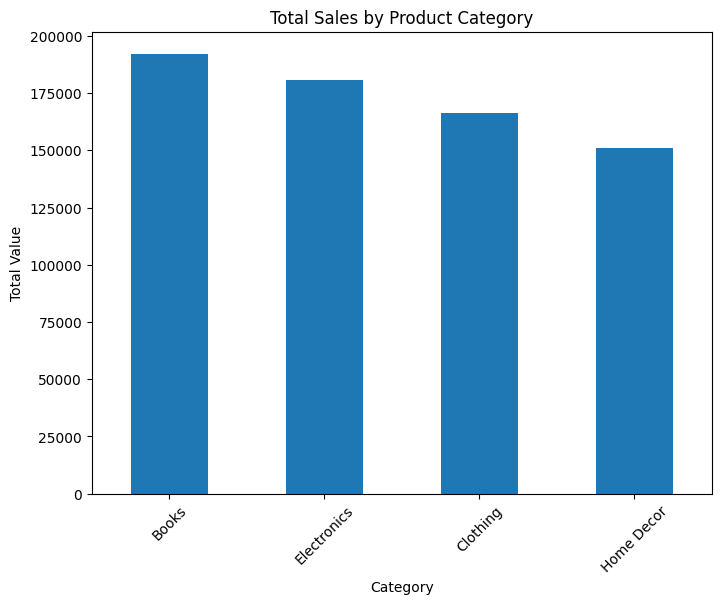

In [49]:
category_sales = merged_data.groupby('Category')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
category_sales.plot(kind='bar')
plt.title('Total Sales by Product Category')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.show()

# Region-wise sales

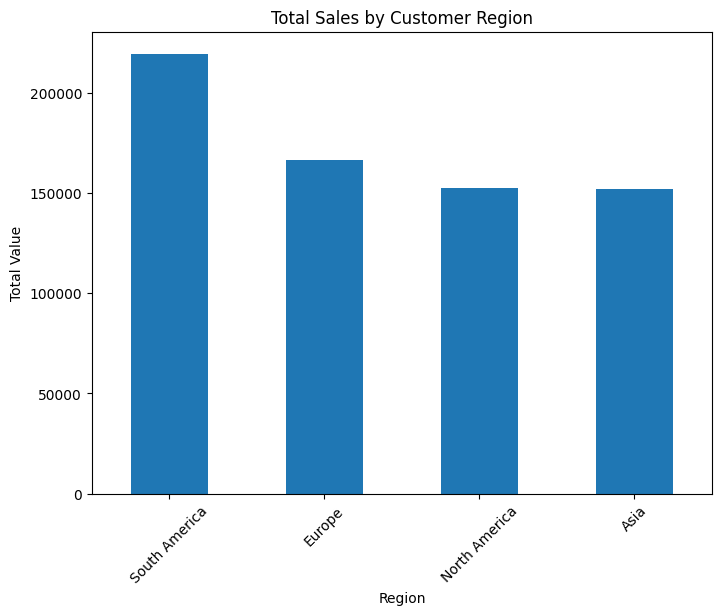

In [51]:
region_sales = merged_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
region_sales.plot(kind='bar')
plt.title('Total Sales by Customer Region')
plt.ylabel('Total Value')
plt.xticks(rotation=45)
plt.show()

# Customer Region vs Product Category Sales (heatmap)

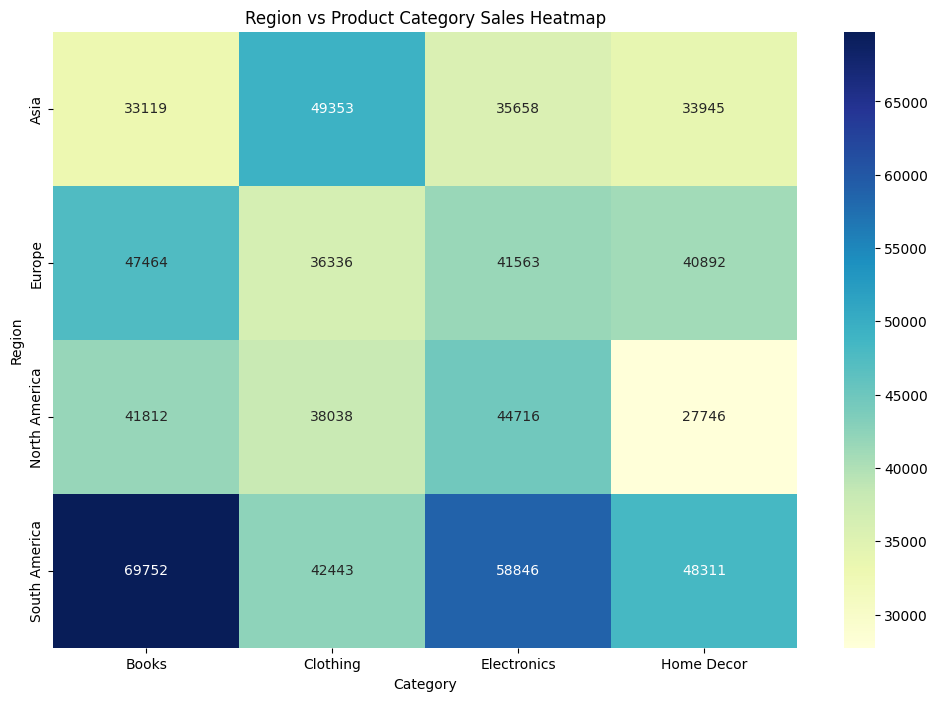

In [52]:
cross_region_category = merged_data.groupby(['Region', 'Category'])['TotalValue'].sum().unstack(fill_value=0)
plt.figure(figsize=(12, 8))
sns.heatmap(cross_region_category, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Region vs Product Category Sales Heatmap')
plt.show()